In [1]:
SEED = 1234

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("Train.csv")

In [3]:
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [4]:
test=pd.read_csv("Test.csv")

In [5]:
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [6]:
print(train.shape)
print(test.shape)

(8908, 16)
(3818, 15)


In [7]:
submission=pd.read_csv("SampleSubmission.csv")

In [8]:
submission.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


# Analysis on Train dataset

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

<AxesSubplot:>

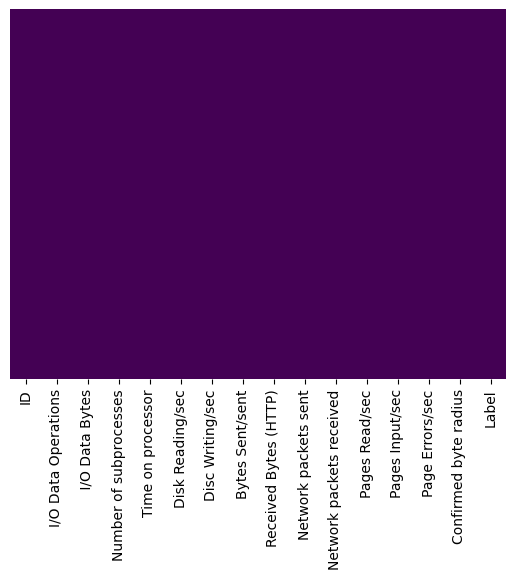

In [10]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

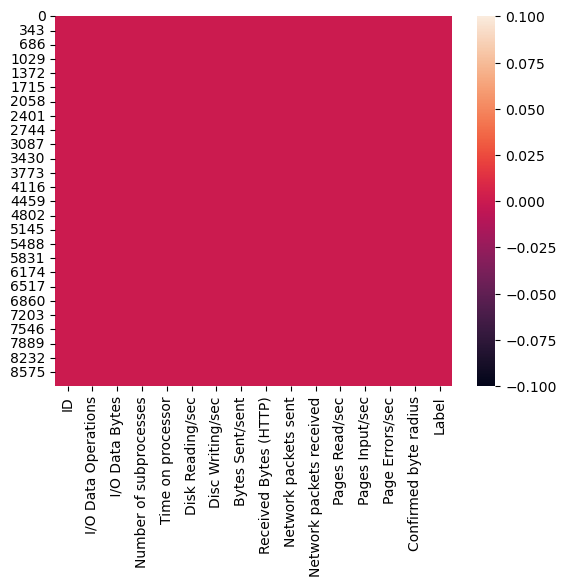

In [11]:
sns.heatmap(train.isna())

In [12]:
train.select_dtypes(include='object')

,ID
0,ID_4W8AP96UO6
1,ID_UD3TM0ZYND
2,ID_XAG1HC0HWM
3,ID_CEXD05IR09
4,ID_X6E97FT8IF
...,...
8903,ID_XJWM9B7X4L
8904,ID_YIC5VRPLUD
8905,ID_T3RF72SEG1
8906,ID_2AUQFJYWKV


In [13]:
#checking for value_counts
train['Label'].value_counts()

0    6504
1    2404
Name: Label, dtype: int64

In [14]:
train['ID'].unique()

array(['ID_4W8AP96UO6', 'ID_UD3TM0ZYND', 'ID_XAG1HC0HWM', ...,
       'ID_T3RF72SEG1', 'ID_2AUQFJYWKV', 'ID_LVH8ZOJXLJ'], dtype=object)

# Explorative Data Analysis

C:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label'>

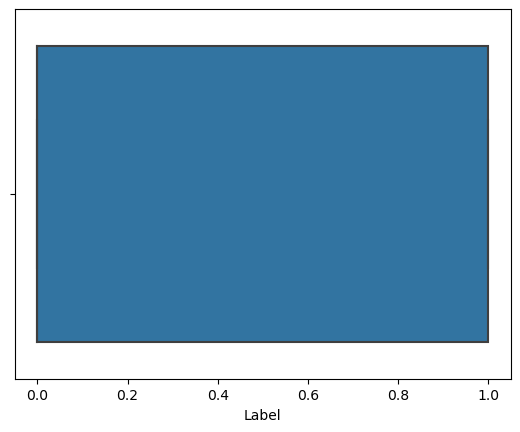

In [15]:
sns.boxplot(train['Label'])

C:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


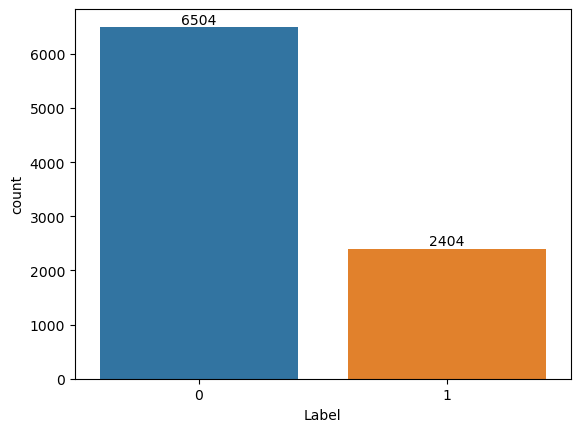

In [16]:
axes=sns.countplot(train['Label'])
axes.bar_label(axes.containers[0])
plt.show()

<AxesSubplot:>

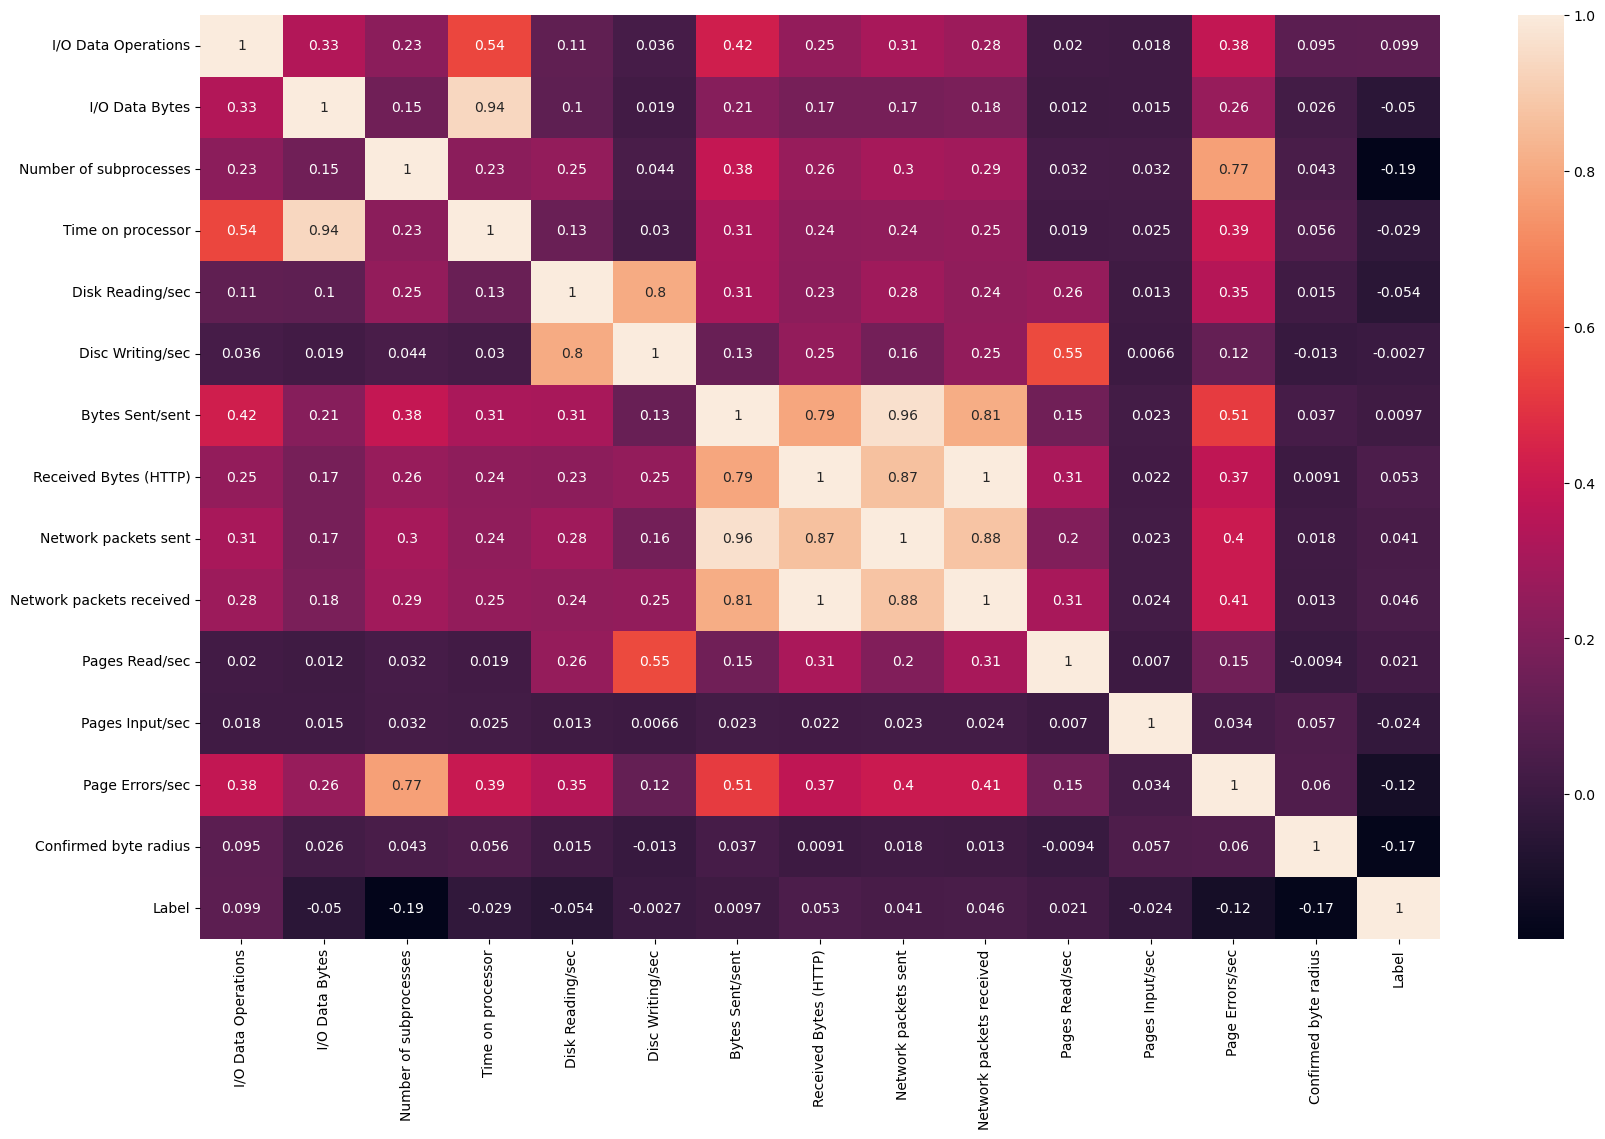

In [17]:
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(),annot=True)

# Model Building

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Random Forest Classifier

In [23]:
features = train.drop(columns=['ID','Label']).columns
target = 'Label'


In [25]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,y_train)

C:\Users\royalgifts\AppData\Local\Temp\ipykernel_8856\708282747.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5)

In [27]:
y_pred=classifier.predict(X_test)

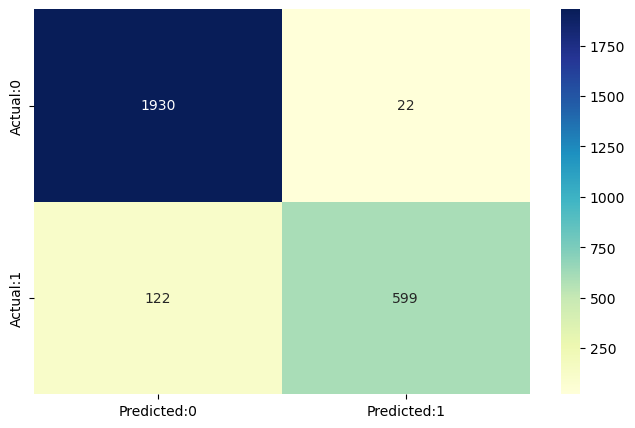

In [28]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

# checking the accuracy and classification report for random forest classifier

In [29]:
print(accuracy_score(y_test,y_pred))

0.9461279461279462


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1952
           1       0.96      0.83      0.89       721

    accuracy                           0.95      2673
   macro avg       0.95      0.91      0.93      2673
weighted avg       0.95      0.95      0.94      2673



In [31]:
from collections import Counter
Counter(y_train)

Counter({'Label': 1})

In [32]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
ns = RandomUnderSampler()
X_train_ns,y_train_ns= ns.fit_resample(X_train,y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_ns)))

The number of classes before fit Counter({'Label': 1})
The number of classes after fit Counter({'Label': 1})


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

C:\Users\royalgifts\AppData\Local\Temp\ipykernel_8856\1320057923.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [34]:
y_pred=classifier.predict(X_test)

<AxesSubplot:>

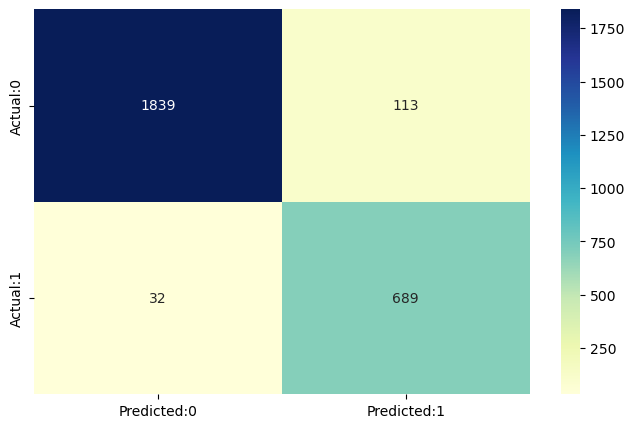

In [35]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [36]:
print(accuracy_score(y_test,y_pred))

0.9457538346427236


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1952
           1       0.86      0.96      0.90       721

    accuracy                           0.95      2673
   macro avg       0.92      0.95      0.93      2673
weighted avg       0.95      0.95      0.95      2673



In [39]:
#make predictions on test set
test['Target'] = classifier.predict(test[features])

In [40]:
sub = test[['ID', 'Target']]

In [41]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [42]:
sub.to_csv("submission_1.csv", index = False)